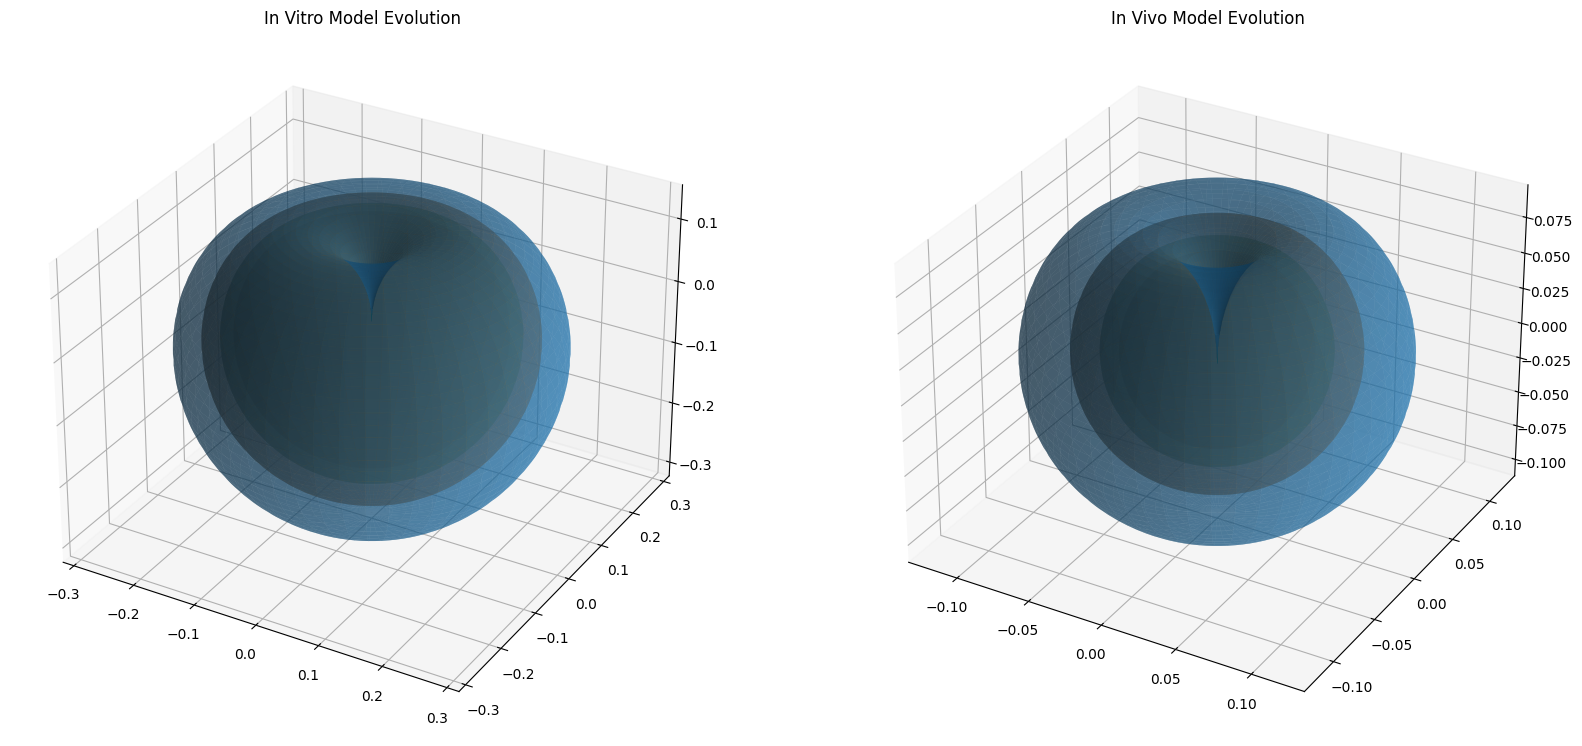

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the evolution functions for in vitro and in vivo models
def S41(R, lam):
    R = np.maximum(R, 1e-5)  # Avoid division by zero
    return np.cosh(np.sqrt(lam) * R) / (np.sinh(np.sqrt(lam) * R) * np.sqrt(lam)) - 1 / (R * lam)

def S50(R, lam):
    epsilon = 1e-5
    R = np.maximum(R, epsilon)  # Avoid division by zero or very small numbers
    s1 = (R + 1) * (np.cosh(np.sqrt(lam) * R) * R * lam - np.sinh(np.sqrt(lam) * R) * np.sqrt(lam))
    s2 = R**2 * lam * (np.cosh(np.sqrt(lam) * R) * lam + np.sinh(np.sqrt(lam) * R) * np.sqrt(lam))
    return s1 / s2

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    return x, y, z

# Define the radii for different evolution stages
lambda_values = [8, 12, 16, 20]

# Generate a mesh for the spherical coordinates
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Set up the figure and axes for the 3D plots
fig = plt.figure(figsize=(20, 10))

# Plot for in vitro model
ax1 = fig.add_subplot(121, projection='3d')
for lam in lambda_values:
    R = S41(phi, lam)
    x, y, z = spherical_to_cartesian(R, theta, phi)
    ax1.plot_surface(x, y, z, alpha=0.5, label=f'λ={lam}')
ax1.set_title('In Vitro Model Evolution')

# Plot for in vivo model
ax2 = fig.add_subplot(122, projection='3d')
for lam in lambda_values:
    R = S50(phi, lam)
    x, y, z = spherical_to_cartesian(R, theta, phi)
    ax2.plot_surface(x, y, z, alpha=0.5, label=f'λ={lam}')
ax2.set_title('In Vivo Model Evolution')

# Show the plot
plt.show()
